In [1]:
pip install kagglehub


   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   ---------------------------------------- 0/2 [tqdm]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 554.8 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/11.0 MB 554.8 kB/s eta 0:00:19
   --- ------------------------------------ 1.0/11.0 MB 570.5 kB/s eta 0:00:18
   ---- ----------------------------------- 1.3/11.0 MB 705.0 kB/s eta 0:00:14
   ----- ---------------------------------- 1.6/11.0 MB 764.4 kB/s eta 0:00:13
   ------ --------------------------------- 1.8/11.0 MB 827.8 kB/s eta 0:00:12
   ------- -------------------------------- 2.1/11.0 MB 848.8 kB/s eta 0:00:11
   -------- ---------------

In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("juhibhojani/house-price")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\porog\.cache\kagglehub\datasets\juhibhojani\house-price\versions\1


In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

#определяем набор данных
file_path = 'C:/Users/porog/.cache/kagglehub/datasets/juhibhojani/house-price/versions/1/house_prices.csv'
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

In [56]:
from scipy import stats
import warnings

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   index            187531 non-null  int64  
 1   title            187531 non-null  object 
 2   description      187531 non-null  object 
 3   amountin_rupees  187531 non-null  object 
 4   price_in_rupees  187531 non-null  float64
 5   location         187531 non-null  object 
 6   carpet_area      187531 non-null  object 
 7   status           187531 non-null  object 
 8   floor            187531 non-null  object 
 9   transaction      187531 non-null  object 
 10  furnishing       187531 non-null  object 
 11  facing           187531 non-null  object 
 12  overlooking      187531 non-null  object 
 13  society          187531 non-null  object 
 14  bathroom         187531 non-null  object 
 15  balcony          187531 non-null  object 
 16  car_parking      187531 non-null  obje

In [7]:
df.describe()

,Index,Price (in rupees),Dimensions,Plot Area
count,187531.000000,1.698660e+05,0.0,0.0
mean,93765.000000,7.583772e+03,NaN,NaN
std,54135.681003,2.724171e+04,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN
25%,46882.500000,4.297000e+03,NaN,NaN
50%,93765.000000,6.034000e+03,NaN,NaN
75%,140647.500000,9.450000e+03,NaN,NaN
max,187530.000000,6.700000e+06,NaN,NaN


In [10]:
df.shape

(187531, 21)

In [ ]:
#Анализ пропусков и heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull, cbar = False, yticklabels = False)
plt.title("Матрица пропусков")
plt.show()
display(miss_df.head(20))

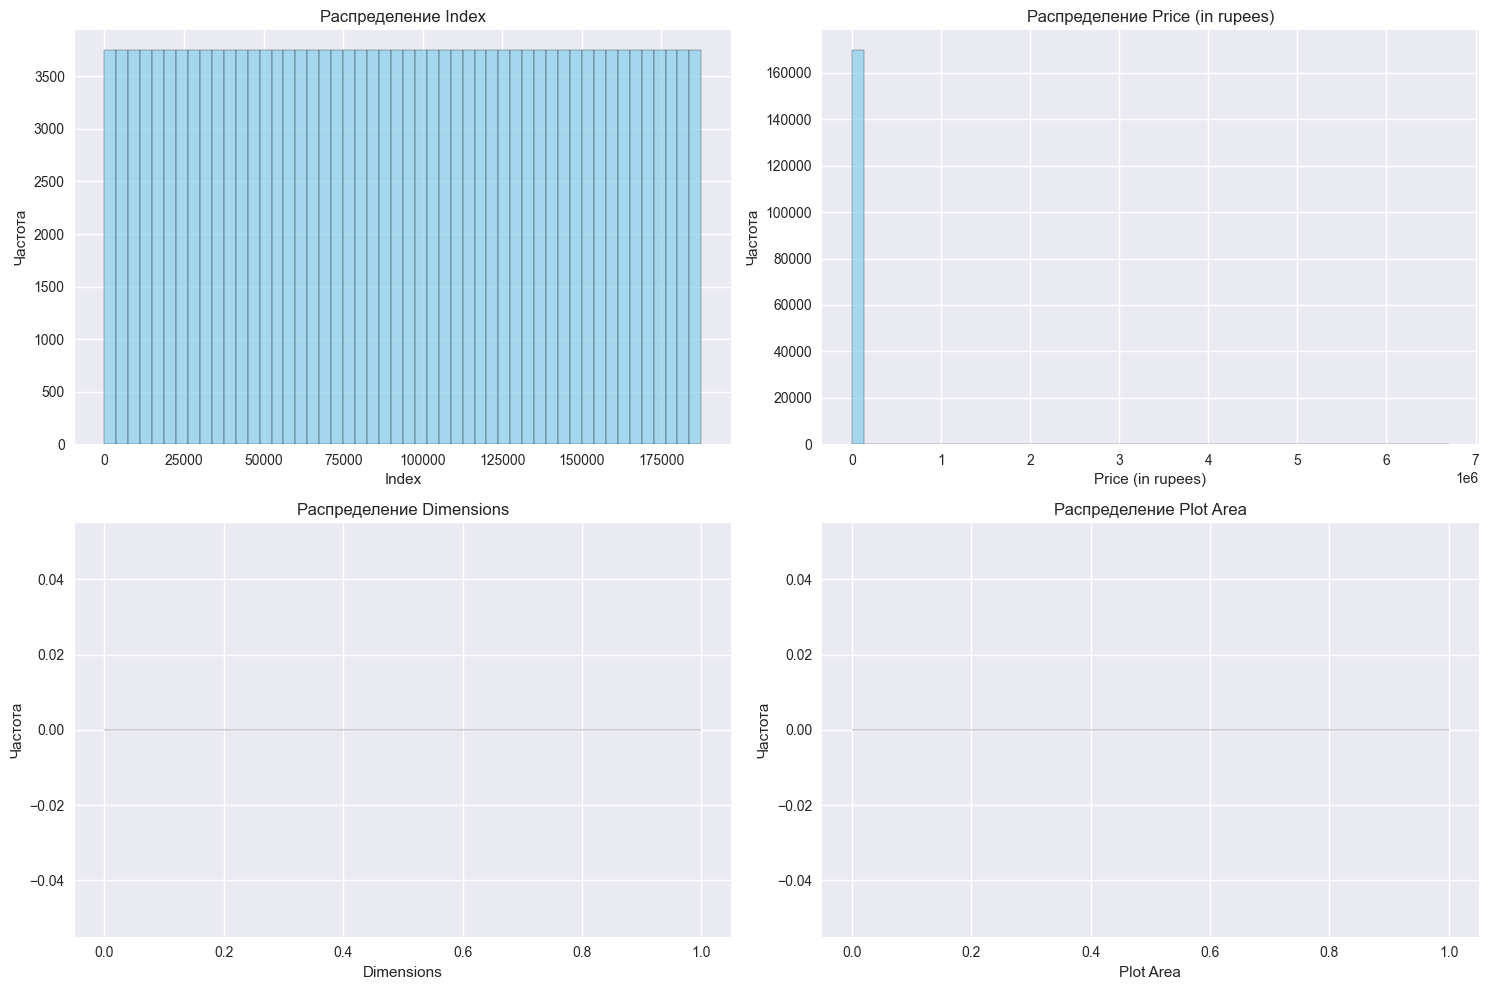

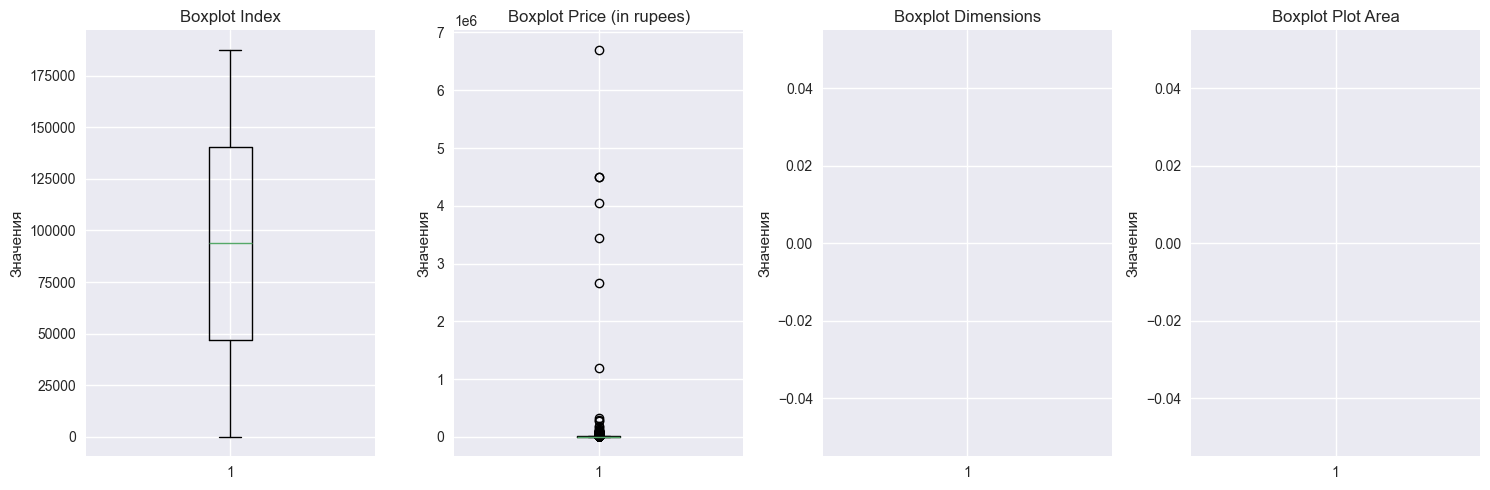

,feature,mean,median,std,skew
0,Index,93765.000000,93765.0,54135.681003,0.00000
1,Price (in rupees),7583.771885,6034.0,27241.705819,177.11337
2,Dimensions,NaN,NaN,NaN,NaN
3,Plot Area,NaN,NaN,NaN,NaN


In [14]:
#3. Анализ числовых признаков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < 4:
        axes[i].hist(df[col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Распределение {col}', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')
        
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot {col}')
    axes[i].set_ylabel('Значения')

plt.tight_layout()
plt.show()

stats_df = pd.DataFrame(stats, columns=['feature','mean','median','std','skew'])
stats_df

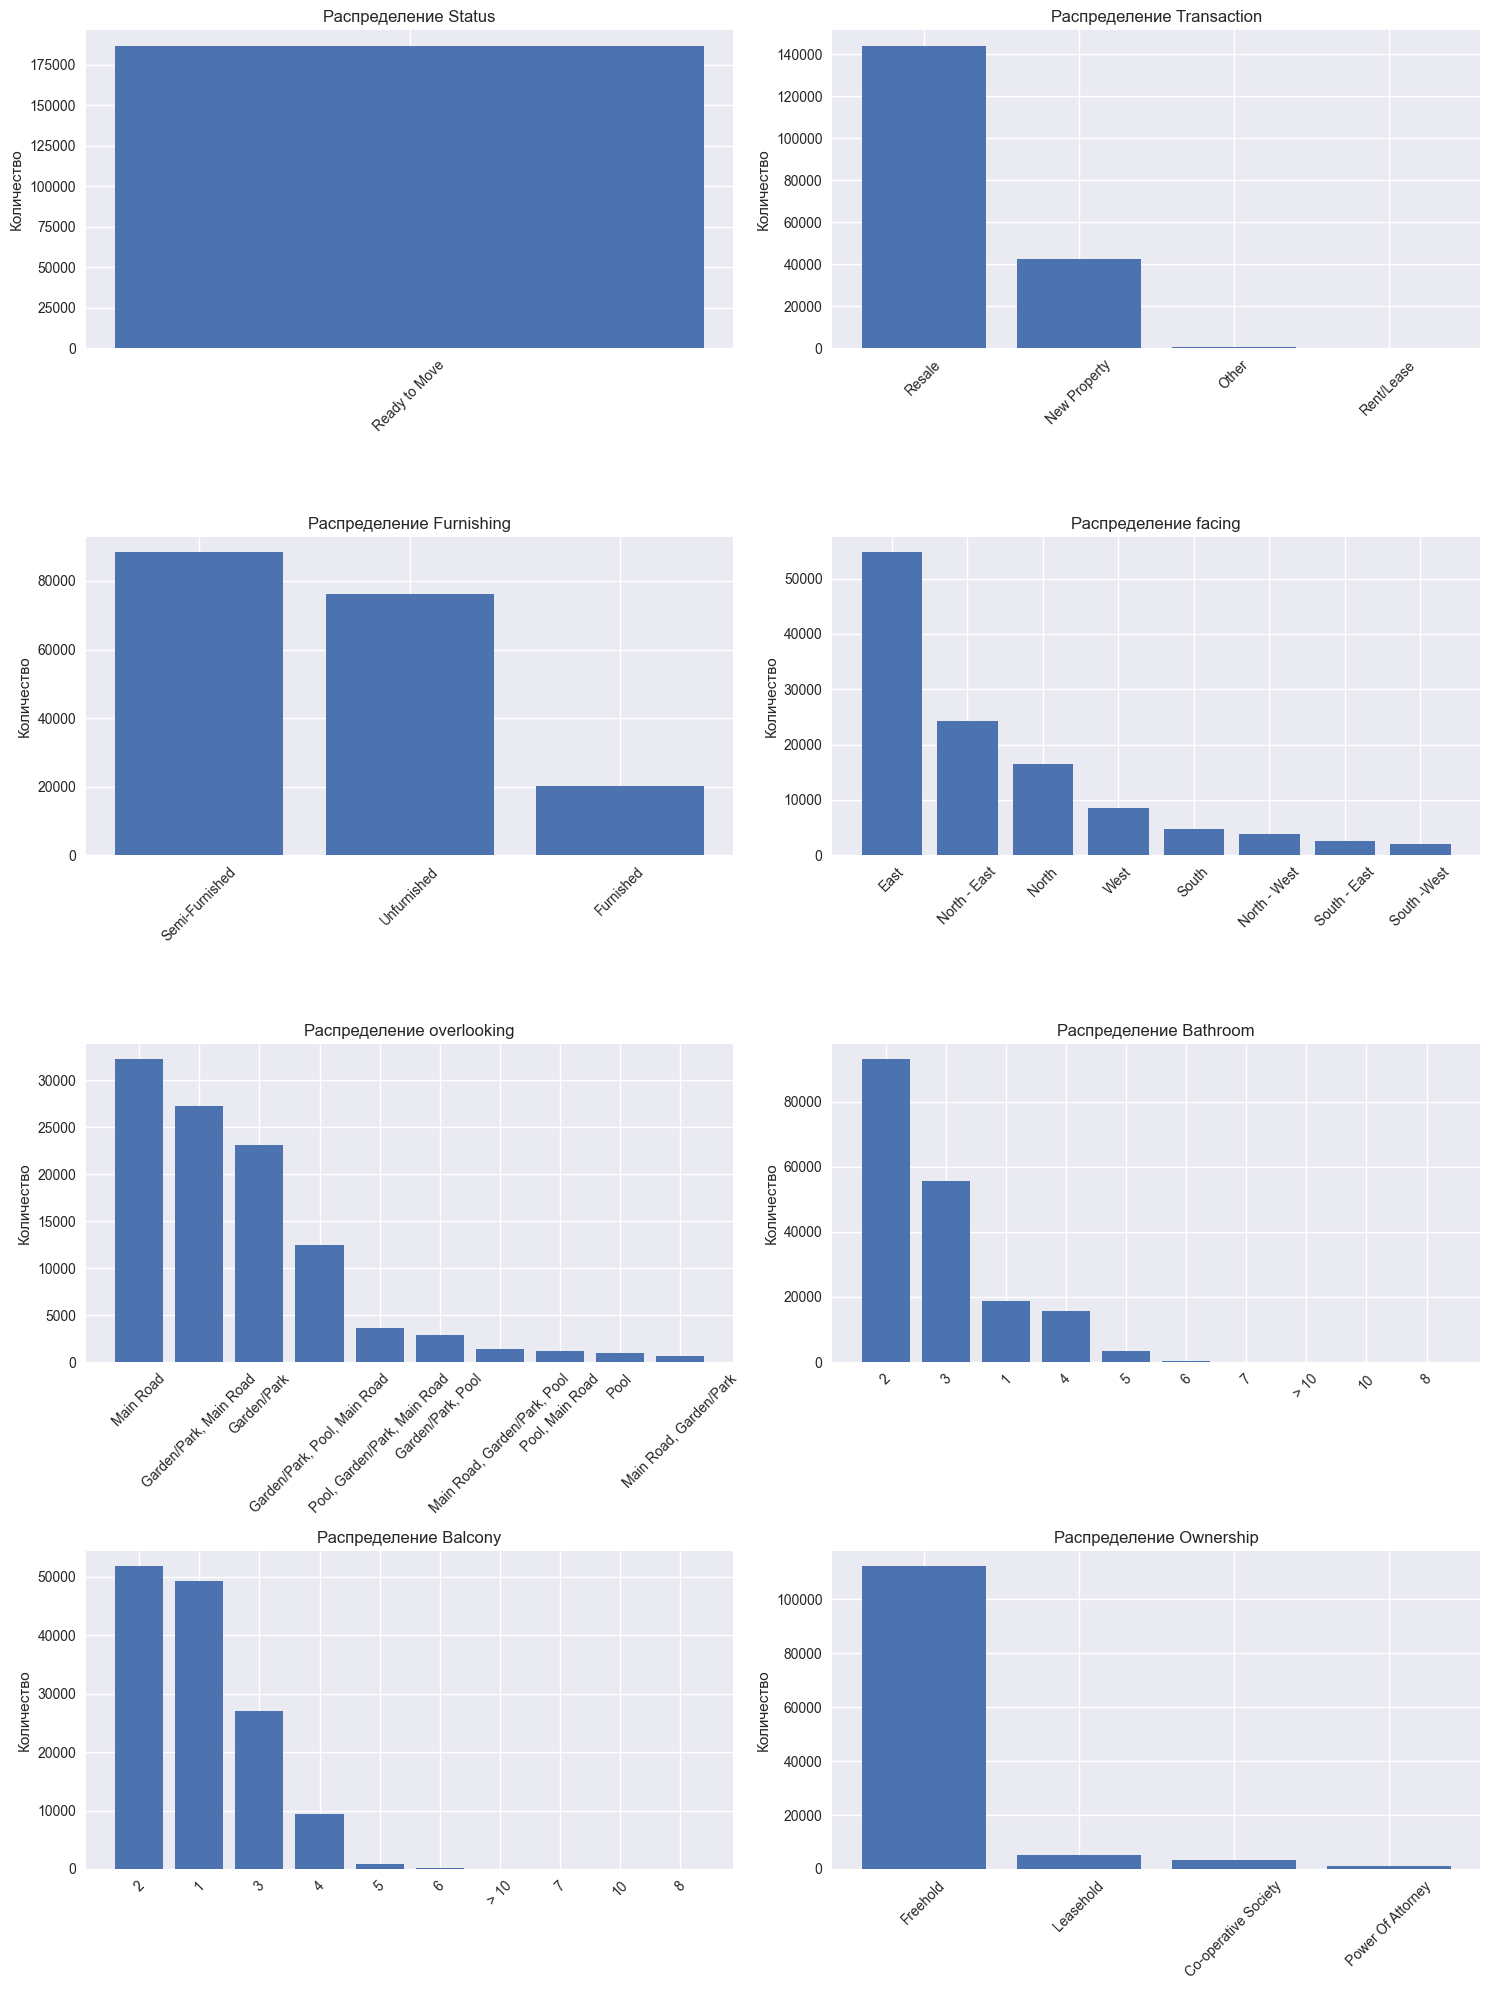


Количество уникальных категорий:
-----------------------------------
Title: 32446 уникальных значений
Description: 65634 уникальных значений
Amount(in rupees): 1561 уникальных значений
location: 81 уникальных значений
Carpet Area: 2758 уникальных значений
Status: 1 уникальных значений
Floor: 947 уникальных значений
Transaction: 4 уникальных значений
Furnishing: 3 уникальных значений
facing: 8 уникальных значений
overlooking: 19 уникальных значений
Society: 10376 уникальных значений
Bathroom: 11 уникальных значений
Balcony: 11 уникальных значений
Car Parking: 229 уникальных значений
Ownership: 4 уникальных значений
Super Area: 2976 уникальных значений


In [24]:
#4. Анализ категориальных признаков
reasonable_cats = [col for col in categorical_cols if df[col].nunique() <= 20]

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(reasonable_cats[:8]):  # Первые 8 признаков
    value_counts = df[col].value_counts().head(10)  # Топ-10 категорий
    axes[i].bar(value_counts.index.astype(str), value_counts.values)
    axes[i].set_title(f'Распределение {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Количество')

plt.tight_layout()
plt.show()

print("\nКоличество уникальных категорий:")
print("-" * 35)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} уникальных значений")

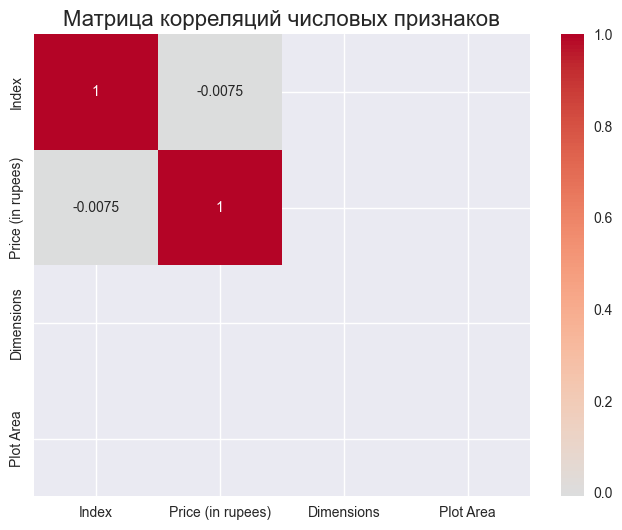

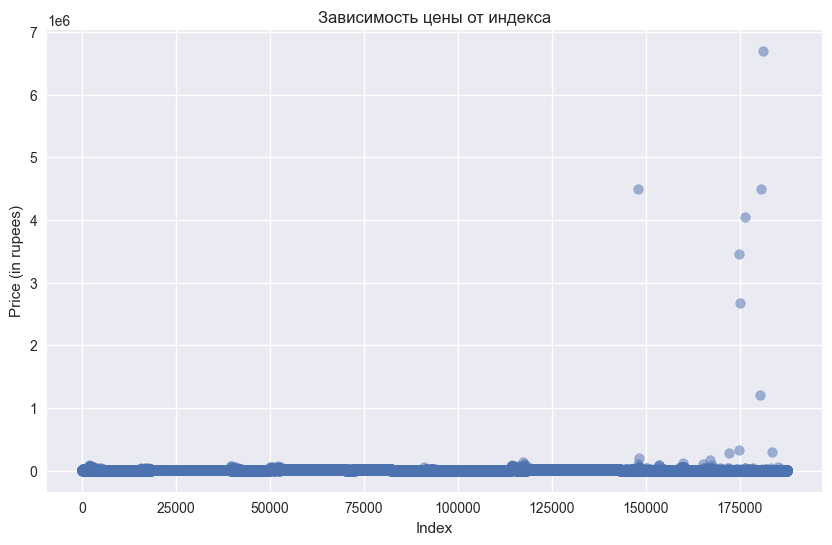

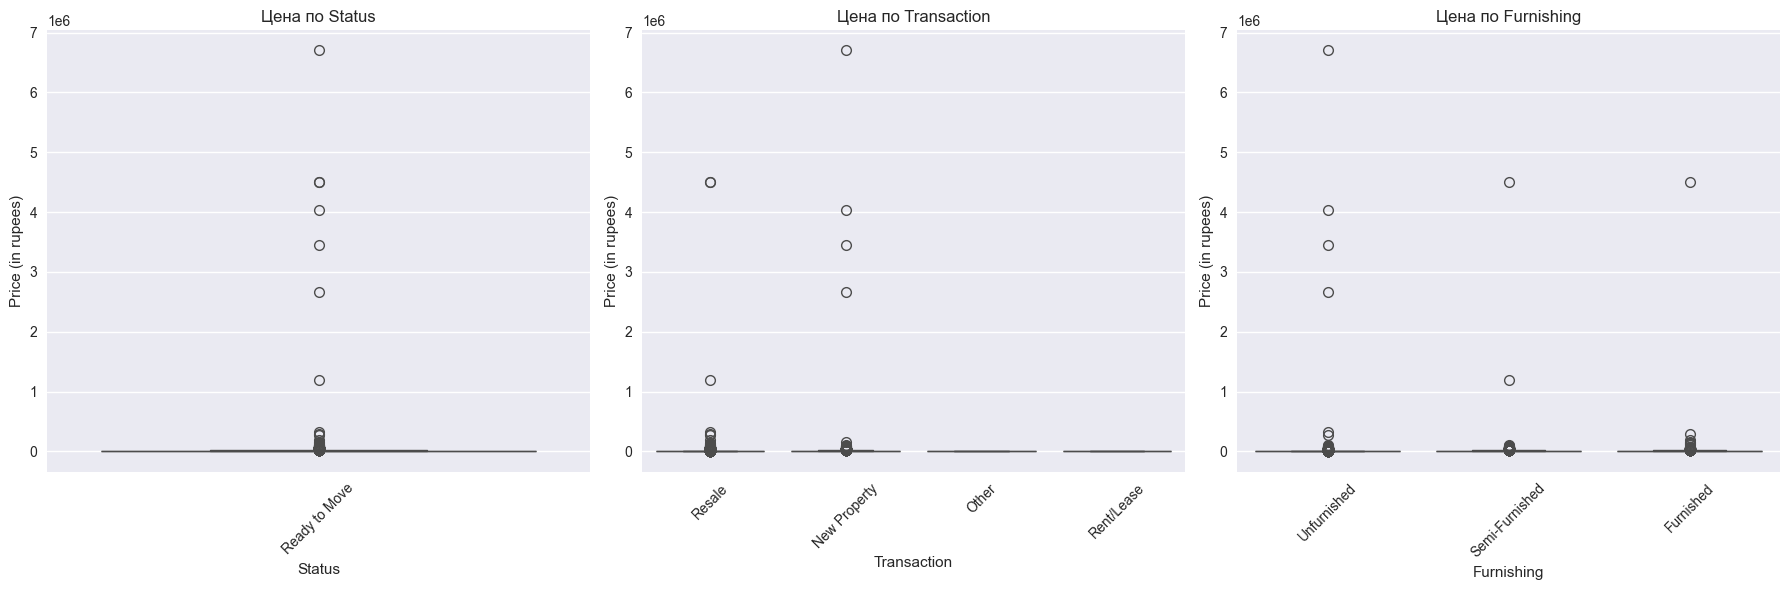

In [31]:
# 5.1 Матрица корреляций
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков', fontsize=16)
plt.show()

# 5.2 Диаграммы рассеяния для Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Index'], df['Price (in rupees)'], alpha=0.5)
plt.title('Зависимость цены от индекса')
plt.xlabel('Index')
plt.ylabel('Price (in rupees)')
plt.show()

# 5.3 Boxplot категориальных и числовых признаков c небольшим кол-ом категорий
cat_for_analysis = [col for col in reasonable_cats if df[col].nunique() <= 5][:3]

fig, axes = plt.subplots(1, len(cat_for_analysis), figsize=(18, 6))
for i, col in enumerate(cat_for_analysis):
    sns.boxplot(x=df[col], y=df['Price (in rupees)'], ax=axes[i])
    axes[i].set_title(f'Цена по {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [52]:
# 6.1 Приведение названий столбцов к нижнему регистру
print("ИСХОДНЫЕ НАЗВАНИЯ СТОЛБЦОВ:")
print(df.columns.tolist())
print()

df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print("НОВЫЕ НАЗВАНИЯ СТОЛБЦОВ (после очистки):")
print(df.columns.tolist())
print("\n" + "="*80)

# 6.2 Обработка пропусков
print("АНАЛИЗ ПРОПУСКОВ ДО ОБРАБОТКИ:")
missing_before = df.isnull().sum()
print(missing_before[missing_before > 0])
print()

# Удаляем полностью пустые столбцы, а также проверяем актуальные названия
empty_columns = []
for col in df.columns:
    if df[col].isnull().sum() == len(df):
        empty_columns.append(col)
        print(f"Обнаружен полностью пустой столбец: {col}")

if empty_columns:
    print(f"УДАЛЯЕМ ПОЛНОСТЬЮ ПУСТЫЕ СТОЛБЦЫ: {empty_columns}")
    df = df.drop(empty_columns, axis=1)
    print(f"Размерность после удаления пустых столбцов: {df.shape}")
else:
    print("Полностью пустых столбцов не обнаружено")
print()

# Заполняем числовые пропуски медианой
numeric_cols_updated = df.select_dtypes(include=[np.number]).columns.tolist()
print("ЧИСЛОВЫЕ ПРИЗНАКИ ДЛЯ ЗАПОЛНЕНИЯ МЕДИАНОЙ:")
for col in numeric_cols_updated:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        print(f"  {col}: {missing_count} пропусков → заполняем медианой ({median_val:.2f})")
        df[col] = df[col].fillna(median_val)
    else:
        print(f"  {col}: пропусков нет")
print()

# Заполняем категориальные пропуски модой
categorical_cols_updated = df.select_dtypes(include=['object']).columns.tolist()
print("КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ДЛЯ ЗАПОЛНЕНИЯ МОДОЙ:")
for col in categorical_cols_updated:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        print(f"  {col}: {missing_count} пропусков → заполняем модой ('{mode_val}')")
        df[col] = df[col].fillna(mode_val)
    else:
        print(f"  {col}: пропусков нет")
print()

print("ПРОВЕРКА ПОСЛЕ ЗАПОЛНЕНИЯ ПРОПУСКОВ:")
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]
if len(remaining_missing) > 0:
    print("Осталось пропусков:")
    print(remaining_missing)
else:
    print("Все пропуски успешно заполнены!")
print("\n" + "="*80)

ИСХОДНЫЕ НАЗВАНИЯ СТОЛБЦОВ:
['Index', 'Title', 'Description', 'Amount(in rupees)', 'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor', 'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society', 'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area', 'Dimensions', 'Plot Area']

НОВЫЕ НАЗВАНИЯ СТОЛБЦОВ (после очистки):
['index', 'title', 'description', 'amountin_rupees', 'price_in_rupees', 'location', 'carpet_area', 'status', 'floor', 'transaction', 'furnishing', 'facing', 'overlooking', 'society', 'bathroom', 'balcony', 'car_parking', 'ownership', 'super_area', 'dimensions', 'plot_area']

АНАЛИЗ ПРОПУСКОВ ДО ОБРАБОТКИ:
description          3023
price_in_rupees     17665
carpet_area         80673
status                615
floor                7077
transaction            83
furnishing           2897
facing              70233
overlooking         81436
society            109678
bathroom              828
balcony             48935
car_parking        103357
owners

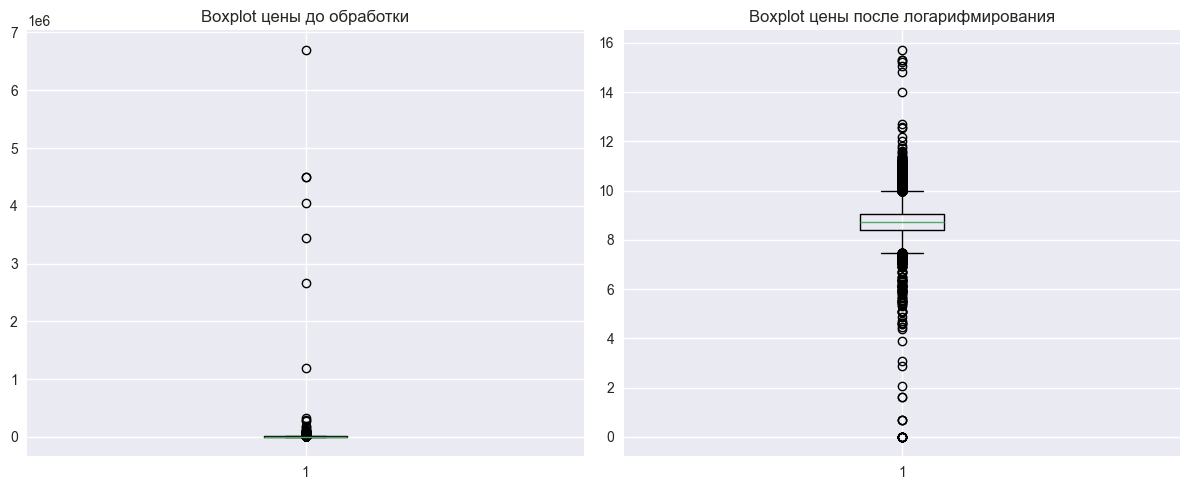

До обработки: 187531 записей
После IQR обрезки: 177086 записей
Удалено выбросов: 10445


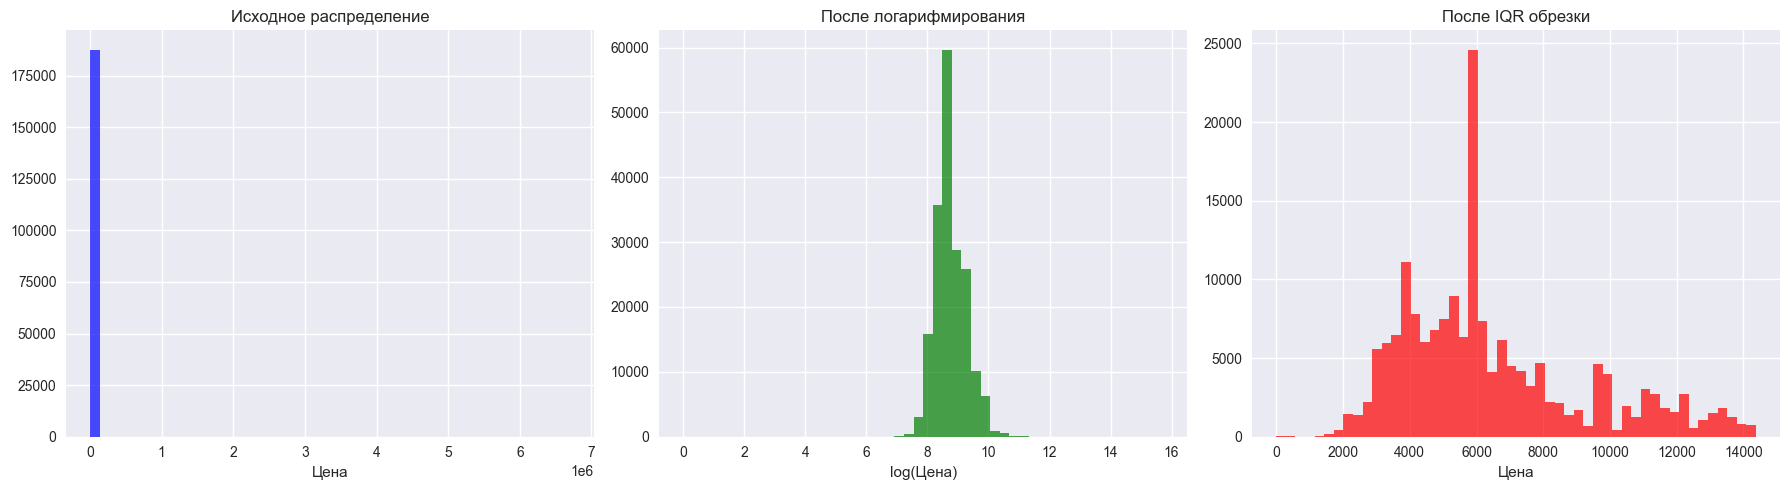

In [54]:
# 7.1 Выбираем признак с выбросами - price_in_rupees
price_data = df['price_in_rupees'].dropna()

# Boxplot до обработки
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(price_data)
plt.title('Boxplot цены до обработки')

# 7.2 Логарифмическое преобразование
price_log = np.log1p(price_data)

# Boxplot после обработки
plt.subplot(1, 2, 2)
plt.boxplot(price_log)
plt.title('Boxplot цены после логарифмирования')
plt.tight_layout()
plt.show()

# 7.3 IQR обрезка
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

price_trimmed = price_data[(price_data >= lower_bound) & (price_data <= upper_bound)]

print(f"До обработки: {len(price_data)} записей")
print(f"После IQR обрезки: {len(price_trimmed)} записей")
print(f"Удалено выбросов: {len(price_data) - len(price_trimmed)}")

# Сравнение распределений
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].hist(price_data, bins=50, alpha=0.7, color='blue')
axes[0].set_title('Исходное распределение')
axes[0].set_xlabel('Цена')

axes[1].hist(price_log, bins=50, alpha=0.7, color='green')
axes[1].set_title('После логарифмирования')
axes[1].set_xlabel('log(Цена)')

axes[2].hist(price_trimmed, bins=50, alpha=0.7, color='red')
axes[2].set_title('После IQR обрезки')
axes[2].set_xlabel('Цена')

plt.tight_layout()
plt.show()

In [55]:
# Проверим текущие названия столбцов
print("ТЕКУЩИЕ НАЗВАНИЯ СТОЛБЦОВ:")
for i, col in enumerate(df.columns):
    print(f"{i:2d}. {col}")
    
# Проверим наличие полностью пустых столбцов
print("\nПОИСК ПОЛНОСТЬЮ ПУСТЫХ СТОЛБЦОВ:")
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = len(df)
    print(f"{col}: {null_count}/{total_count} пропусков ({null_count/total_count*100:.1f}%)")
    
    if null_count == total_count:
        print(f"  ⚠️  СТОЛБЕЦ ПОЛНОСТЬЮ ПУСТОЙ!")

ТЕКУЩИЕ НАЗВАНИЯ СТОЛБЦОВ:
 0. index
 1. title
 2. description
 3. amountin_rupees
 4. price_in_rupees
 5. location
 6. carpet_area
 7. status
 8. floor
 9. transaction
10. furnishing
11. facing
12. overlooking
13. society
14. bathroom
15. balcony
16. car_parking
17. ownership
18. super_area

ПОИСК ПОЛНОСТЬЮ ПУСТЫХ СТОЛБЦОВ:
index: 0/187531 пропусков (0.0%)
title: 0/187531 пропусков (0.0%)
description: 0/187531 пропусков (0.0%)
amountin_rupees: 0/187531 пропусков (0.0%)
price_in_rupees: 0/187531 пропусков (0.0%)
location: 0/187531 пропусков (0.0%)
carpet_area: 0/187531 пропусков (0.0%)
status: 0/187531 пропусков (0.0%)
floor: 0/187531 пропусков (0.0%)
transaction: 0/187531 пропусков (0.0%)
furnishing: 0/187531 пропусков (0.0%)
facing: 0/187531 пропусков (0.0%)
overlooking: 0/187531 пропусков (0.0%)
society: 0/187531 пропусков (0.0%)
bathroom: 0/187531 пропусков (0.0%)
balcony: 0/187531 пропусков (0.0%)
car_parking: 0/187531 пропусков (0.0%)
ownership: 0/187531 пропусков (0.0%)
super_ar